## What is Gradient Descent?
Imagine you're blindfolded on a mountain and want to reach the bottom (lowest point). You:

    Feel the ground with your foot
    Take a step in the steepest downward direction
    Repeat until you reach the bottom

That's exactly what Gradient Descent does! It finds the best solution by taking small steps toward the optimal answer.

### Types of Gradient Descent 
1. Batch Gradient (Direct Solution)

Calculates the exact answer mathematically
Pros: Exact solution, no iterations needed
Cons: Slow with large datasets, doesn't work with all models

2. Stochastic Gradient Descent (SGD)

Uses ONE data point at a time
Pros: Fast, memory efficient, can escape local minima
Cons: Noisy, jumpy path

3. Mini-batch Gradient Descent

Uses SMALL BATCHES of data (e.g., 32 points)
Pros: Best of both worlds - speed and stability
Cons: Need to choose batch size

### Loading Data
Let us generate synthetic data for sake of simplicity

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate linear data: y = 3x + 7 + noise
X = 2 * np.random.rand(100, 1)
y = 3 * X + 7 + np.random.randn(100, 1)

# Add bias term (X0 = 1) for matrix ops
X_b = np.c_[np.ones((100, 1)), X] 


### Cost / Loss Function:

In [72]:
def compute_mse(X, y, theta):
    m = len(y)
    predictions = X @ theta
    error = predictions - y
    return (1 / (2 * m)) * np.sum(error ** 2)


### Visualization Function

In [73]:
def plot_loss(histories, labels):
    plt.figure(figsize=(10, 6))
    for history, label in zip(histories, labels):
        losses = [l for _, l in history]
        plt.plot(losses, label=label)
    plt.xlabel("Iterations")
    plt.ylabel("Loss (MSE)")
    plt.title("Loss vs Iterations")
    plt.legend()
    plt.grid(True)
    plt.show()

### Batch Gradient Descent

In [74]:
def batch_gd(X, y, lr = 0.1, epochs = 100):
    m = len(y)
    theta = np.random.randn(2, 1)
    history = []

    for epoch in range(epochs):
        gradients = (1 / m) * X.T @ (X @ theta - y)
        theta -= lr * gradients
        loss = compute_mse(X, y, theta)
        history.append((theta.copy(), loss))

    return theta, history

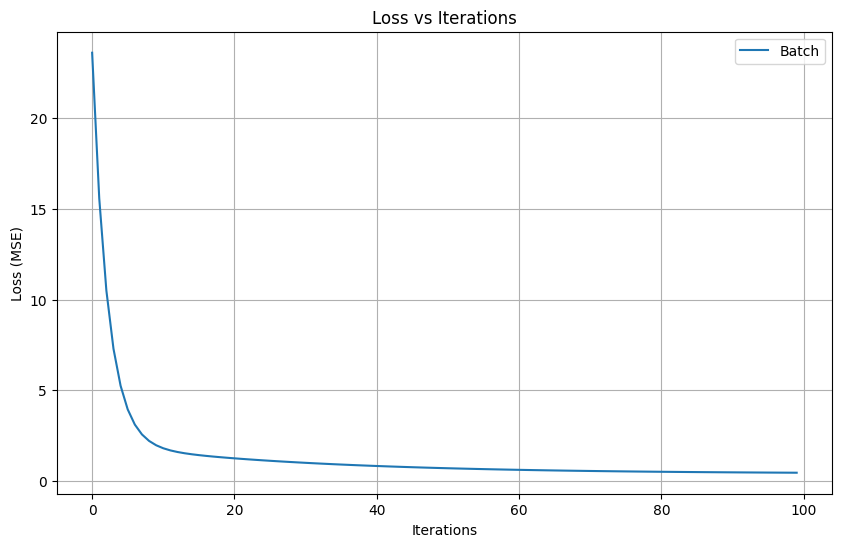

In [75]:
theta_b, hist_b = batch_gd(X_b, y)
plot_loss([hist_b], ["Batch"])

In [76]:
def stochastic_gd(X, y, lr = 0.01, epochs = 50):
    m = len(y)
    theta = np.random.randn(2, 1)
    history = []

    # the only difference here is that we slice one row only, and compute individual gradient
    for epoch in range(epochs):
        indices = np.random.permutation(m)
        for i in indices:
            xi = X[i:i+1]
            yi = y[i:i+1]

            prediction = xi @theta
            error = prediction - yi
            gradient = xi.T @ error

            theta -= lr * gradient

            loss = np.mean((prediction - yi) ** 2)
            history.append((epoch * m + i, loss))
    return theta, history

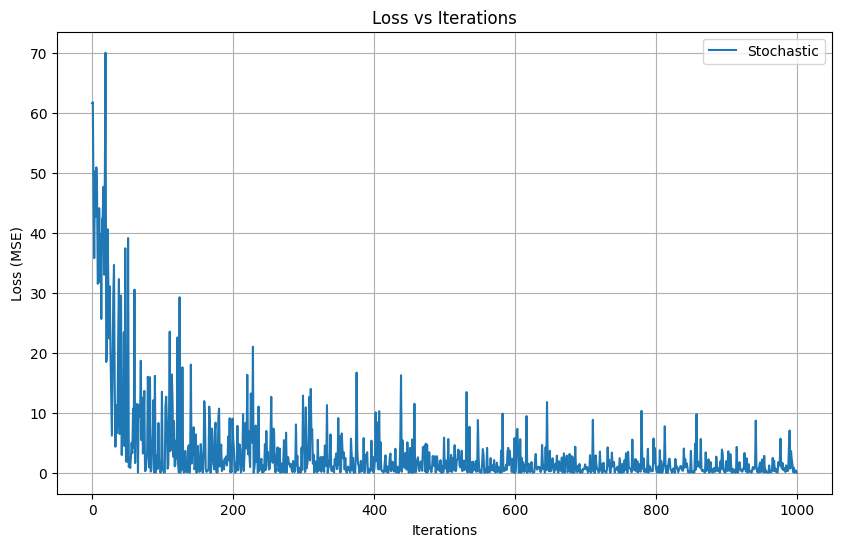

In [77]:
theta_s, hist_s = stochastic_gd(X_b, y)
plot_loss([hist_s[:1000]], ["Stochastic"])

### Mini Batch Gradient Descent

In [78]:
def mini_batch_gd(X, y, lr=0.01, epochs=100, batch_size=16):
    m = len(y)
    theta = np.random.randn(2, 1)
    history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # ⛓ Process in mini-batches
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]    
            yi = y_shuffled[i:i+batch_size]     

            prediction = xi @ theta             
            error = prediction - yi
            gradient = xi.T @ error / len(xi)  

            theta -= lr * gradient

            loss = np.mean((prediction - yi) ** 2)
            step = epoch * (m // batch_size) + i // batch_size
            history.append((step, loss))

    return theta, history

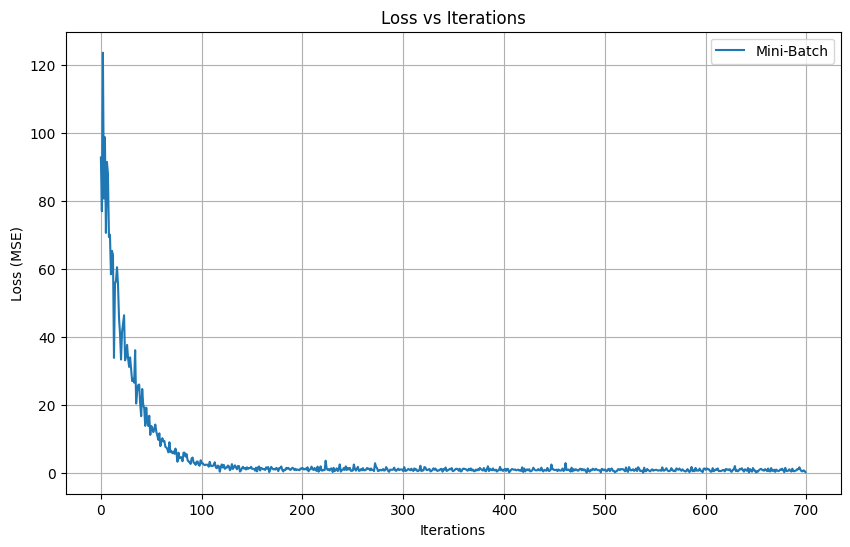

In [79]:
theta_m, hist_m = mini_batch_gd(X_b, y)
plot_loss([hist_m], ["Mini-Batch"])

In [80]:
print("Batch Final Loss:", hist_b[-1][1])
print("Stochastic Final Loss:", hist_s[-1][1])
print("Mini-Batch Final Loss:", hist_m[-1][1])


Batch Final Loss: 0.4599985185893705
Stochastic Final Loss: 0.6244463341369171
Mini-Batch Final Loss: 0.28242909324145976
